# Business Objective Of this Case Study
# ---------------------**-------------------------**

### The **Lending Club** company is the largest online loan marketplace,facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed.
### In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as **charged-off** are the **defaulters**. 

### If one is able to identify these risky loan applicants, then such loans can be reduced thereby 
### cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.
### In other words, the company wants us to understand the driving factors (or driver variables) behind loan default,i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 



## Importing Required Packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows',150)
pd.set_option('display.max_columns',150)

## Importing the required files

In [189]:
# This is because 32bit processes only gets 2GB of memory to play with by default.
# pandas.read_csv function takes the option dtype to let pandas know what data types are being used inside csv data.
loan=pd.read_csv("loan.csv",encoding="ISO-8859_1",low_memory=False)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [190]:
loan.shape

(39717, 111)

In [191]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [192]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

### Data Cleaning

In [193]:
loan.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [194]:
missing = round(100*(loan.isnull().sum()/len(loan.id)), 2)
missing.loc[missing > 0]

emp_title                           6.19
emp_length                          2.71
desc                               32.58
title                               0.03
mths_since_last_delinq             64.66
mths_since_last_record             92.99
revol_util                          0.13
last_pymnt_d                        0.18
next_pymnt_d                       97.13
last_credit_pull_d                  0.01
collections_12_mths_ex_med          0.14
mths_since_last_major_derog       100.00
annual_inc_joint                  100.00
dti_joint                         100.00
verification_status_joint         100.00
tot_coll_amt                      100.00
tot_cur_bal                       100.00
open_acc_6m                       100.00
open_il_6m                        100.00
open_il_12m                       100.00
open_il_24m                       100.00
mths_since_rcnt_il                100.00
total_bal_il                      100.00
il_util                           100.00
open_rv_12m     

In [195]:
percent_missing = round(loan.isnull().sum()*100 / len(loan),2)
missing_value_df = pd.DataFrame({'column_name': loan.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing')
missing_value_df

,column_name,percent_missing
id,id,0.00
member_id,member_id,0.00
loan_amnt,loan_amnt,0.00
funded_amnt,funded_amnt,0.00
funded_amnt_inv,funded_amnt_inv,0.00
term,term,0.00
int_rate,int_rate,0.00
installment,installment,0.00
grade,grade,0.00
sub_grade,sub_grade,0.00


In [196]:
#number of columns having all the missing values is 54,as columns having 100pc missing values will be 1.
(missing_value_df['percent_missing']>=30).sum()

58

In [197]:
missing_pc = round(100*(loan.isnull().sum()/len(loan.id)), 2)
missing_pc.loc[missing > 0]

emp_title                           6.19
emp_length                          2.71
desc                               32.58
title                               0.03
mths_since_last_delinq             64.66
mths_since_last_record             92.99
revol_util                          0.13
last_pymnt_d                        0.18
next_pymnt_d                       97.13
last_credit_pull_d                  0.01
collections_12_mths_ex_med          0.14
mths_since_last_major_derog       100.00
annual_inc_joint                  100.00
dti_joint                         100.00
verification_status_joint         100.00
tot_coll_amt                      100.00
tot_cur_bal                       100.00
open_acc_6m                       100.00
open_il_6m                        100.00
open_il_12m                       100.00
open_il_24m                       100.00
mths_since_rcnt_il                100.00
total_bal_il                      100.00
il_util                           100.00
open_rv_12m     

In [198]:
#Number of columns having more than 30 p.c of missing values
columns_with_missing_values = list(missing_pc[missing_pc >= 30].index)

len(columns_with_missing_values)

58

In [199]:
#After removing the required columns, 53 columns are still left
loan = loan.drop(columns_with_missing_values,axis=1)
loan.shape

(39717, 53)

In [200]:
#Now we r left with columns having very less no. of missing values
missing_pc = round(100*(loan.isnull().sum()/len(loan.id)), 2)
missing_pc.loc[missing > 0]

emp_title                     6.19
emp_length                    2.71
title                         0.03
revol_util                    0.13
last_pymnt_d                  0.18
last_credit_pull_d            0.01
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
pub_rec_bankruptcies          1.75
tax_liens                     0.10
dtype: float64

In [201]:
#Checking for the number of unique rows each of the remaining columns have
print("unique_values emp_title : %d"  % len(loan.emp_title.unique()))
print("unique_values emp_length : %d"  % len(loan.emp_length.unique()))
print("unique_values title : %d"  % len(loan.title.unique()))
print("unique_values revol_util : %d"  % len(loan.revol_util.unique()))
print("unique_values title : %d"  % len(loan.title.unique()))
print("unique_values last_pymnt_d : %d"  % len(loan.last_pymnt_d.unique()))
print("unique_values last_credit_pull_d : %d"  % len(loan.last_credit_pull_d.unique()))
print("unique_values collections_12_mths_ex_med : %d"  % len(loan.collections_12_mths_ex_med.unique()))
print("unique_values chargeoff_within_12_mths : %d"  % len(loan.chargeoff_within_12_mths.unique()))
print("unique_values pub_rec_bankruptcies : %d"  % len(loan.pub_rec_bankruptcies.unique()))
print("unique_values tax_liens : %d"  % len(loan.tax_liens.unique()))

unique_values emp_title : 28821
unique_values emp_length : 12
unique_values title : 19616
unique_values revol_util : 1090
unique_values title : 19616
unique_values last_pymnt_d : 102
unique_values last_credit_pull_d : 107
unique_values collections_12_mths_ex_med : 2
unique_values chargeoff_within_12_mths : 2
unique_values pub_rec_bankruptcies : 4
unique_values tax_liens : 2


There are columns having very less number of unique rows, so they might be containing values with range or what we say CATEGORICAL 

In [202]:
loan.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [203]:
loan.tax_liens.unique()

array([ 0., nan])

In [204]:
loan.pub_rec_bankruptcies.unique()

array([ 0.,  1.,  2., nan])

In [205]:
loan.chargeoff_within_12_mths.unique()

array([ 0., nan])

In [206]:
loan.collections_12_mths_ex_med.unique()

array([ 0., nan])

In [207]:
#Dropping the columns with 0 and nan values
drop_list=['tax_liens','chargeoff_within_12_mths','collections_12_mths_ex_med']
loan=loan.drop(drop_list,axis=1)

In [208]:
loan.shape

(39717, 50)

In [209]:
missing = round(100*(loan.isnull().sum()/len(loan.id)), 2) 
missing[missing > 0]

emp_title               6.19
emp_length              2.71
title                   0.03
revol_util              0.13
last_pymnt_d            0.18
last_credit_pull_d      0.01
pub_rec_bankruptcies    1.75
dtype: float64

emp_title and emp_length contains the title of the job that the employee does and the time period.So, cleaning these rows of any null values

In [210]:
loan.dropna(subset=['emp_title'],how='any',inplace=True)
loan.dropna(subset=['emp_length'],how='any',inplace=True)
loan.dropna(subset=['pub_rec_bankruptcies'],how='any',inplace=True)

In [211]:
loan.shape

(36548, 50)

In [212]:
missing = round(100*(loan.isnull().sum()/len(loan.id)), 2) 
missing[missing > 0]

title           0.02
revol_util      0.13
last_pymnt_d    0.18
dtype: float64

In [213]:
loan.dropna(subset=['title','revol_util','last_pymnt_d'],how='any',inplace=True)

In [214]:
loan.shape

(36433, 50)

In [215]:
print(loan.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'policy_code',
       'application_type', 'acc_now_delinq', 'delinq_amnt',
       'pub_rec_bankruptcies'],
      dtype='object')


In [216]:
date_time_cols=['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']
loan[date_time_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 4 columns):
issue_d               36433 non-null object
earliest_cr_line      36433 non-null object
last_pymnt_d          36433 non-null object
last_credit_pull_d    36433 non-null object
dtypes: object(4)
memory usage: 1.4+ MB


In [217]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,1,INDIVIDUAL,0,0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,1,INDIVIDUAL,0,0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,1,INDIVIDUAL,0,0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,f,0.00,0.00,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,1,INDIVIDUAL,0,0,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Loan,280xx,NC,23.51,0,Jul-05,1,7,0,17726,85.60%,11,f,0.00,0.00,10110.84,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,1,INDIVIDUAL,0,0,0.0


In [218]:
#as all the date time elements are present in 'month-date'format,converting all to a date time format
import datetime as dt
loan.earliest_cr_line = pd.to_datetime(loan.earliest_cr_line, format='%b-%y')
loan.last_pymnt_d = pd.to_datetime(loan.last_pymnt_d, format='%b-%y')
loan.last_credit_pull_d = pd.to_datetime(loan.last_credit_pull_d, format='%b-%y')
loan.issue_d=pd.to_datetime(loan.issue_d, format='%b-%y')

In [219]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,1999-04-01,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,1,INDIVIDUAL,0,0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,1996-02-01,1,10,0,5598,21%,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,1,INDIVIDUAL,0,0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,1996-01-01,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,1,INDIVIDUAL,0,0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,2004-11-01,3,9,0,7963,28.30%,12,f,0.00,0.00,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,1,INDIVIDUAL,0,0,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Loan,280xx,NC,23.51,0,2005-07-01,1,7,0,17726,85.60%,11,f,0.00,0.00,10110.84,10110.84,6985.61,3125.23,0.00,0.00,0.00,2016-05-01,1313.76,2016-05-01,1,INDIVIDUAL,0,0,0.0


The column 'Term' contains the number of time payment has been done on the loan,but have 'months' written after the numerical value..

In [220]:
loan.term.value_counts()

 36 months    26377
 60 months    10056
Name: term, dtype: int64

In [221]:
loan['term']=loan['term'].apply(lambda x:x.split()[0])
loan.term.value_counts()

36    26377
60    10056
Name: term, dtype: int64

The column 'int_rate' contains the interest rate of each individual, but have '%' written after the numerical value

In [29]:
loan['int_rate']=loan['int_rate'].apply(lambda x:x.split('%')[0])
loan.int_rate.value_counts()

10.99    956
13.49    826
11.49    825
7.51     787
7.88     725
        ... 
17.46      1
20.52      1
16.15      1
22.64      1
24.40      1
Name: int_rate, Length: 371, dtype: int64

In [223]:
loan['revol_util']=loan['revol_util'].apply(lambda x:x.split('%')[0])
loan.revol_util.value_counts()

0        852
0.20      58
66.60     55
61        55
64.80     55
70.40     55
63        54
32        53
37.60     53
40.70     53
46.40     53
78.70     53
57.40     52
0.10      52
27.20     52
51.60     52
66.70     52
68.70     52
70.80     51
65.90     51
46.60     51
41        51
66.10     51
70.10     51
31.20     51
62.80     51
29.10     50
48.20     50
54.60     50
51.50     50
54.30     50
68.60     50
60.20     50
89.50     50
64.60     50
75.50     50
25.50     50
48.90     50
55.80     49
76.60     49
35.70     49
36.50     49
74.90     49
66.90     49
62.30     49
43.40     49
89.90     49
23.70     49
72.10     48
48        48
35.30     48
45.90     48
47.80     48
49.80     48
53.90     48
55.50     48
40.20     48
54        48
45.60     48
52.40     48
73.20     48
58.70     48
57.70     47
57.80     47
57.90     47
70        47
34.40     47
57.20     47
41.40     47
52.30     47
79.70     47
55.20     47
64.30     47
30.90     47
41.60     47
        ... 
5.33       1

In [224]:
emp_length_dict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}

In [225]:
loan=loan.replace({'emp_length':emp_length_dict})

In [226]:
loan['emp_length']

1         0
3        10
4         1
5         3
6         8
7         9
9         0
10        5
11       10
12        0
13        3
14        3
15        0
16        4
17       10
18        1
19        6
20        3
21       10
22       10
23        5
24        1
25        2
27        2
28       10
29        0
31        5
32        2
33        2
34        7
35       10
36        2
37        1
38        1
39        1
40        4
41       10
43       10
44       10
45        6
46       10
47        6
48       10
49        5
50        8
51        9
52        0
53        4
54        1
55        7
56        7
57        0
58        2
59        1
60        0
62        0
63        0
64       10
65        7
66        5
67        4
68        4
69        2
70        5
71        5
72        1
73        3
74        0
75       10
76       10
77        0
78        1
79       10
80        3
81        2
         ..
38946    10
38947     1
38948     7
38950     3
38951     3
38952     3
38953     1
3895

## earliest_cr_line: 
The month the borrower's earliest reported credit line was opened. Let's split the date column into earliest_cr_line_month and earliest_cr_line_year

In [227]:
loan['earliest_cr_line_month'] = loan['earliest_cr_line'].dt.month
loan['earliest_cr_line_year'] = loan['earliest_cr_line'].dt.year

In [228]:
loan['earliest_cr_line_year']

1        1999
3        1996
4        1996
5        2004
6        2005
7        2007
9        2004
10       1998
11       1989
12       2004
13       2003
14       1991
15       2007
16       1998
17       1993
18       2003
19       2001
20       1997
21       1983
22       1985
23       2003
24       2001
25       2002
27       2003
28       1984
29       2006
31       1981
32       1997
33       2005
34       2007
35       2005
36       2000
37       2004
38       2007
39       2001
40       2003
41       1994
43       2004
44       1995
45       1999
46       1995
47       2006
48       1992
49       2002
50       1992
51       1999
52       2004
53       2006
54       2000
55       1998
56       1998
57       2004
58       2000
59       2007
60       2002
62       2002
63       2006
64       1997
65       2005
66       1995
67       2002
68       2000
69       2004
70       2000
71       1994
72       2005
73       2005
74       1994
75       1984
76       1999
77       2000
78    

**issue_d:** The month which the loan was funded .Lets split the available date into month and year column.

In [229]:
loan['issue_d_month']=loan['issue_d'].dt.month
loan['issue_d_year']=loan['issue_d'].dt.year

In [230]:
loan['issue_d_year']

1        2011
3        2011
4        2011
5        2011
6        2011
7        2011
9        2011
10       2011
11       2011
12       2011
13       2011
14       2011
15       2011
16       2011
17       2011
18       2011
19       2011
20       2011
21       2011
22       2011
23       2011
24       2011
25       2011
27       2011
28       2011
29       2011
31       2011
32       2011
33       2011
34       2011
35       2011
36       2011
37       2011
38       2011
39       2011
40       2011
41       2011
43       2011
44       2011
45       2011
46       2011
47       2011
48       2011
49       2011
50       2011
51       2011
52       2011
53       2011
54       2011
55       2011
56       2011
57       2011
58       2011
59       2011
60       2011
62       2011
63       2011
64       2011
65       2011
66       2011
67       2011
68       2011
69       2011
70       2011
71       2011
72       2011
73       2011
74       2011
75       2011
76       2011
77       2011
78    

In [231]:
loan.shape

(36433, 54)

In [232]:
loan.loan_status.value_counts()

Fully Paid     30424
Charged Off     4943
Current         1066
Name: loan_status, dtype: int64

Text(0.5, 1.0, 'Percentage of loans fully paid, charged off and current')

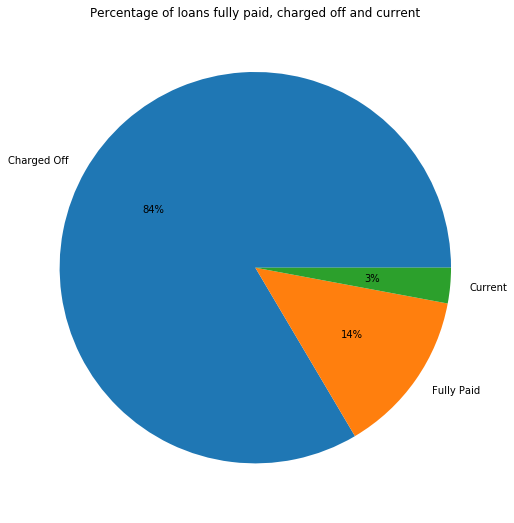

In [233]:
from itertools import chain
from collections import Counter

paid_percent = round(sum(loan.loan_status == 'Fully Paid')/len(loan) * 100, 2)
charged_off_percent = round(sum(loan.loan_status == 'Charged Off')/len(loan) * 100, 2)
current_percent = round(sum(loan.loan_status == 'Current')/len(loan) * 100, 2)

cts = Counter(loan.loan_status.unique())
fig, ax = plt.subplots()
fig.set_size_inches(10, 9)
plt.pie([paid_percent, charged_off_percent, current_percent], labels=cts.keys(), autopct='%1.0f%%')
plt.title('Percentage of loans fully paid, charged off and current')

Fully Paid:Non Defaulter:

Charged Off:Defaulter;

Current:On going transaction,**can be dropped off**

In [234]:
loan = loan[loan['loan_status'].isin(['Fully Paid','Charged Off'])]
loan.shape

(35367, 54)

In [235]:
loan.grade.value_counts()

B    10718
A     9140
C     7181
D     4663
E     2481
F      902
G      282
Name: grade, dtype: int64

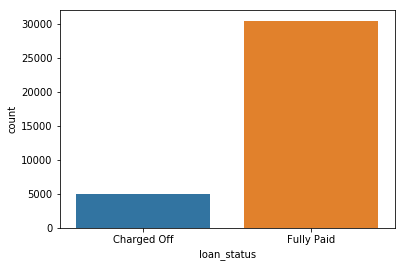

In [236]:
sns.countplot(x= loan["loan_status"])
plt.show()

In [237]:
loan.loan_status.value_counts()

Fully Paid     30424
Charged Off     4943
Name: loan_status, dtype: int64

In [238]:
loan['loan_status'].value_counts(normalize=True)*100

Fully Paid     86.023694
Charged Off    13.976306
Name: loan_status, dtype: float64

**The amount of charged off is around 14 percent, which is the amount of defaulters also.That is a class imbalance here.**

**Debt to Interest** = Total debt/Total income; If this amount is more,the amount of risk also increases,Based on which interesr rate also increases,based on which grades are also being provided.
The more the grades, The risk is more.

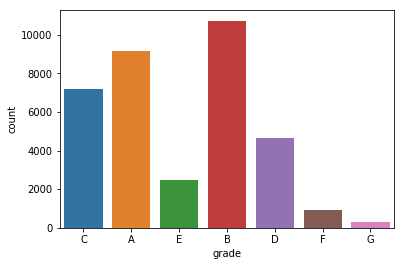

In [239]:
sns.countplot(x='grade', data=loan)
plt.show()

**Inference**:Most of the loans have Grade 'A','B','C'.

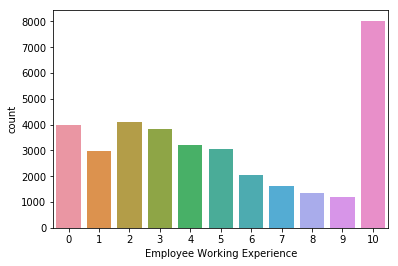

In [240]:
sns.countplot(x='emp_length', data=loan)
plt.xlabel('Employee Working Experience')
plt.show()

**Inference**:Majority of employees having more than 10 years of experience are applying for loan

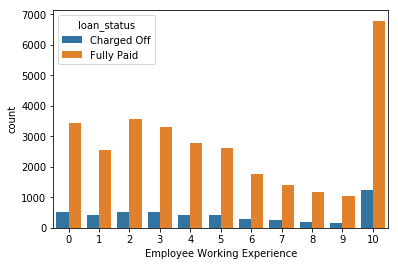

In [241]:
sns.countplot(x='emp_length', hue='loan_status', data=loan)
plt.xlabel('Employee Working Experience')
plt.show()

**Inference**:Mostly people with more than 10 yrs of working experience, has fully paid the loan.

**Funded_amnt**:The total amount committed to that loan at that point in time.If at some point in time, the credit department reduces the loan ,that will be reflected here.

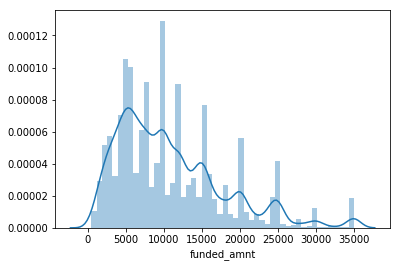

In [242]:
sns.distplot(loan['funded_amnt'])
plt.show()

In [243]:
loan.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,12286.147077,8064.255961,1000.0,6000.0,10000.0,17000.0,35000.0
Fully Paid,30424.0,10945.731166,7181.867451,500.0,5500.0,9600.0,15000.0,35000.0


**Inference**:Funded loan amount is left skewed with mean greater than the median.Most of the loans are granted are less than 15000. and the max. loan provided is 35000.

**Inference**:Only two applicants are there having more than 30 lacs of annual income 

In [244]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,earliest_cr_line_month,earliest_cr_line_year,issue_d_month,issue_d_year
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,1999-04-01,5,3,0,1687,9.40,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,1,INDIVIDUAL,0,0,0.0,4,1999,12,2011
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,1996-02-01,1,10,0,5598,21,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,1,INDIVIDUAL,0,0,0.0,2,1996,12,2011
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,2004-11-01,3,9,0,7963,28.30,12,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,1,INDIVIDUAL,0,0,0.0,11,2004,12,2011
6,1069639,1304742,7000,7000,7000.0,60,15.96,170.08,C,C5,Southern Star Photography,8,RENT,47004.0,Not Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Loan,280xx,NC,23.51,0,2005-07-01,1,7,0,17726,85.60,11,f,0.0,0.0,10110.840000,10110.84,6985.61,3125.23,0.00,0.00,0.00,2016-05-01,1313.76,2016-05-01,1,INDIVIDUAL,0,0,0.0,7,2005,12,2011
7,1072053,1288686,3000,3000,3000.0,36,18.64,109.43,E,E1,MKC Accounting,9,RENT,48000.0,Source Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,car,Car Downpayment,900xx,CA,5.35,0,2007-01-01,2,4,0,8221,87.50,4,f,0.0,0.0,3939.135294,3939.14,3000.00,939.14,0.00,0.00,0.00,2015-01-01,111.34,2014-12-01,1,INDIVIDUAL,0,0,0.0,1,2007,12,2011


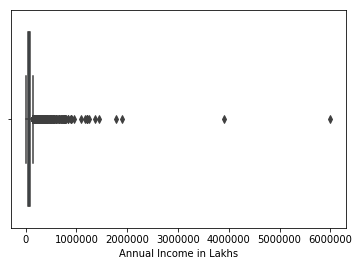

In [245]:
sns.boxplot(x=loan['annual_inc'])
plt.xlabel('Annual Income in Lakhs')
plt.show()

**inference**:There are two people having more than 3 lacs of income

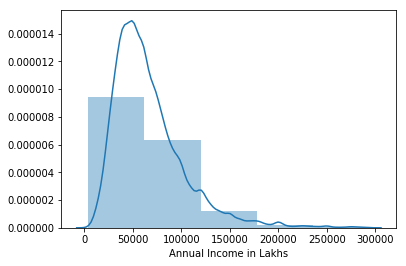

In [246]:
sns.distplot(loan[loan['annual_inc'] < 300000]['annual_inc'], bins=5)
plt.xlabel('Annual Income in Lakhs')
plt.show()

**inference**:Majority of loan applicants have income less than 150000

**total_pymnt**:Payments received to date for total amount funded
**funded_amnt**:The total amount committed to that loan at that time.


In [247]:
# Creating a profit and loss column
loan['Profit_and_Loss']=(
    loan['total_pymnt']-loan['funded_amnt']
)*100/loan['funded_amnt']

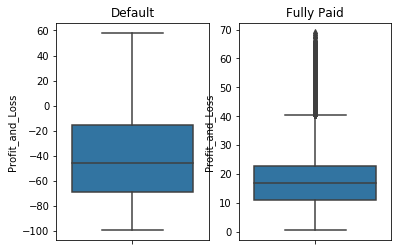

In [248]:
#Relationship of Funded Amount with defaults
plt.subplot(1,2,1)
plt.title('Default')
sns.boxplot(y=loan[loan.loan_status=='Charged Off'].Profit_and_Loss)


plt.subplot(1,2,2)
plt.title('Fully Paid')
sns.boxplot(y=loan[loan.loan_status=='Fully Paid'].Profit_and_Loss)
plt.show()

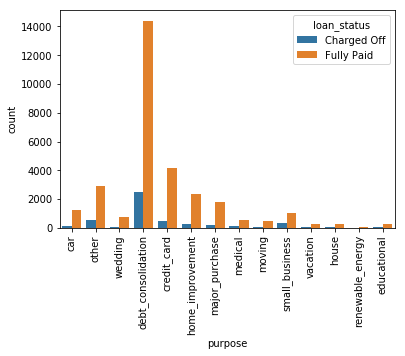

In [249]:
sns.countplot(x='purpose', hue="loan_status", data=loan)
plt.xticks(rotation=90)
plt.show()

**inference**:Majority of loan has been given for the purpose of debt consolidation and has been paid off.

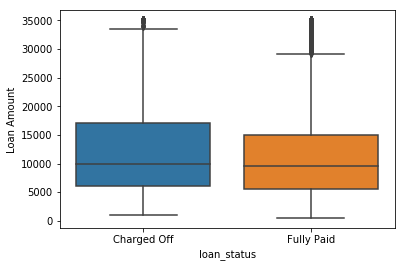

In [250]:
sns.boxplot( y="loan_amnt", x='loan_status' , data=loan)
plt.ylabel('Loan Amount')
plt.show()

**Inference**:Charged off loans tend to have more amount than fully paid

In [22]:
loan.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.0,12104.385108,8085.732038,900.0,5600.0,10000.0,16500.0,35000.0
Fully Paid,32950.0,10866.455994,7199.629493,500.0,5200.0,9600.0,15000.0,35000.0


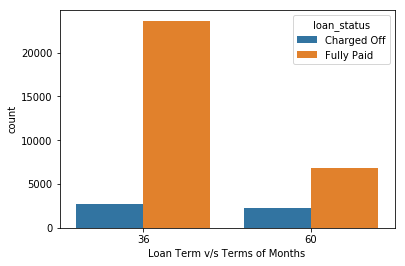

In [251]:
sns.countplot( x="term", hue='loan_status', data=loan)
plt.xlabel('Loan Term v/s Terms of Months')
plt.show()

In [24]:
# lets check charge off rate with different loan terms
loan.groupby('term')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

term
 36 months    0.110909
 60 months    0.253138
Name: loan_status, dtype: float64

**inference**:percentage of charge off of a loan for 60 months time period is two times higher than that of 36 months 

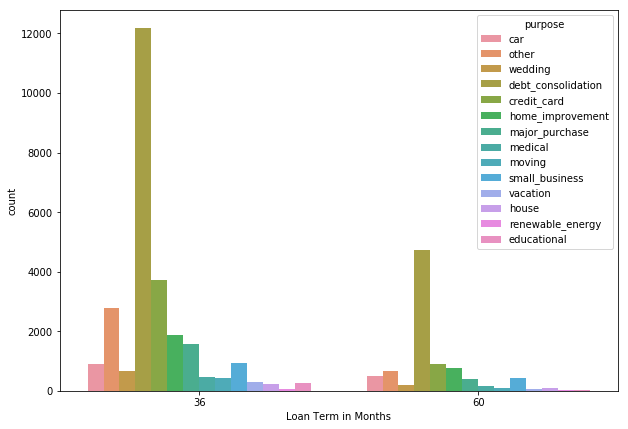

In [252]:
plt.figure(figsize=(10,7))
sns.countplot( x="term", hue='purpose', data=loan)
plt.xlabel('Loan Term in Months')
plt.show()

**inference**:Most of the people with term of 36 months has maximum purposes of obtaining loans.

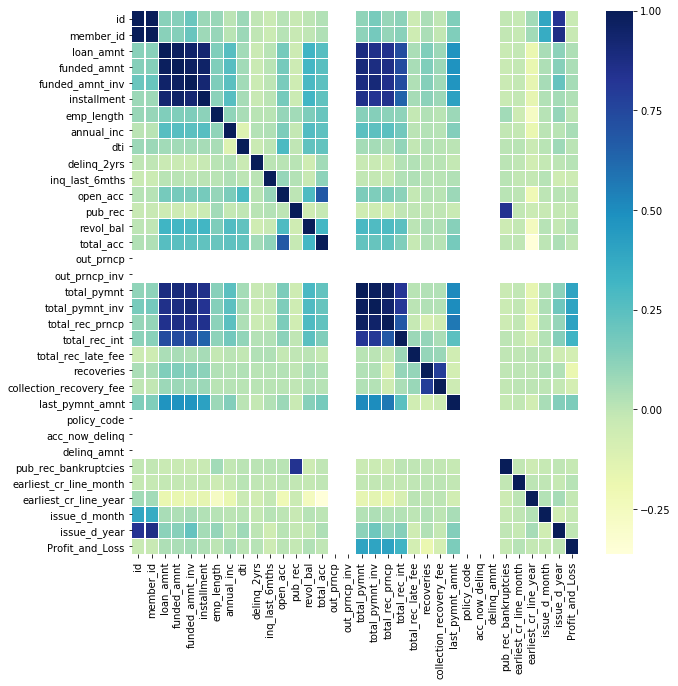

In [253]:
## plotting a correlation matrix for entire data to identify the patterns

loan_correlation_matrix = loan.corr()
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
sns.heatmap(loan_correlation_matrix, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 
plt.show()

In [39]:
loan['int_rate'] = loan['int_rate'].astype(float)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
## analysis on interest rate v/s loan status.
loan.groupby('loan_status')['int_rate'].describe()


,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.0,13.820432,3.654413,5.42,11.31,13.61,16.40,24.40
Fully Paid,32950.0,11.609761,3.599964,5.42,8.49,11.49,13.99,24.11


We can see that charged off interest rate is significantly higher than Fully paid interest rate

loan_status  charged_off_percentage  fully_paid_percentage
grade                                                     
A                              5.61                  94.39
B                             11.69                  88.31
C                             16.29                  83.71
D                             21.02                  78.98
E                             26.12                  73.88
F                             31.71                  68.29
G                             32.98                  67.02


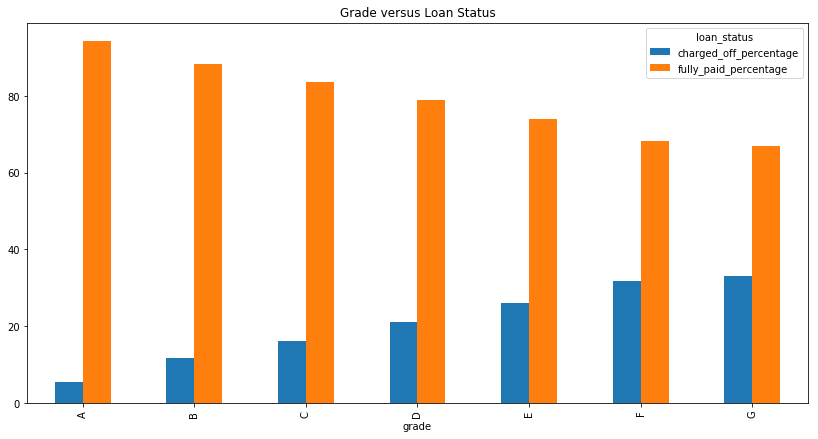

In [256]:
## Bivariate analysis on two categorical variables loan status and grade

loan_crosstab = pd.crosstab(loan['grade'], loan['loan_status'])
loan_crosstab['sum_of_charged_off_and_fully_paid'] = loan_crosstab['Charged Off'] + loan_crosstab['Fully Paid']

### calculating percentages grade-wise
loan_crosstab['charged_off_percentage'] = round((loan_crosstab['Charged Off']/loan_crosstab.sum_of_charged_off_and_fully_paid)*100, 2)
loan_crosstab['fully_paid_percentage'] = round((loan_crosstab['Fully Paid']/loan_crosstab.sum_of_charged_off_and_fully_paid)*100, 2)

######## dropping unnecessary columns in contingency table
loan_crosstab.drop(columns=['Charged Off', 'Fully Paid', 'sum_of_charged_off_and_fully_paid'], inplace=True)
print(loan_crosstab)

loan_crosstab.sort_values(by='charged_off_percentage').plot.bar(stacked=False, figsize=(14,7),  title='Grade versus Loan Status')

**inference**:From the above plot, we can see that as we move from hogher grade to lower grade, i.e 'A' TO 'G', The percentage of charged off is increasing.That indicates the corelation between loan defaulters and grades

loan_status  charged_off_percentage  fully_paid_percentage
term                                                      
36                            10.35                  89.65
60                            24.62                  75.38


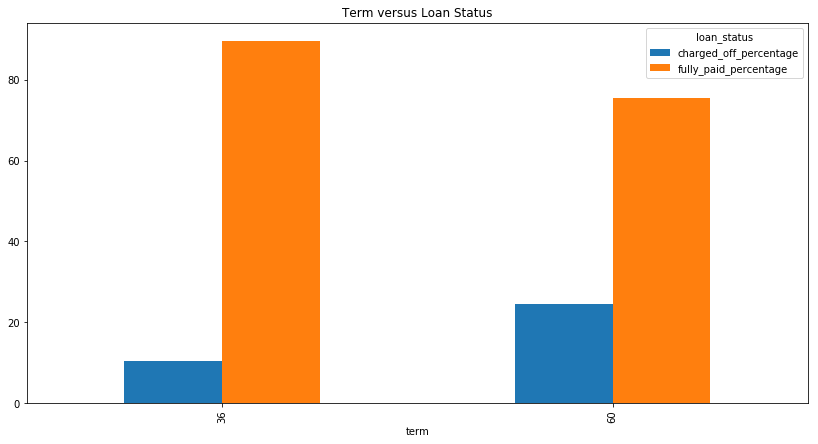

In [258]:
## Bivariate analysis on loan status and Term


loan_crosstab = pd.crosstab(loan['term'], loan['loan_status'])
loan_crosstab['sum_of_charged_off_and_fully_paid'] = loan_crosstab['Charged Off'] + loan_crosstab['Fully Paid']

### calculating percentages
loan_crosstab['charged_off_percentage'] = round((loan_crosstab['Charged Off']/loan_crosstab.sum_of_charged_off_and_fully_paid)*100, 2)
loan_crosstab['fully_paid_percentage'] = round((loan_crosstab['Fully Paid']/loan_crosstab.sum_of_charged_off_and_fully_paid)*100, 2)

######## dropping unnecessary columns in contingency table
loan_crosstab.drop(columns=['Charged Off', 'Fully Paid', 'sum_of_charged_off_and_fully_paid'], inplace=True)
print(loan_crosstab)

loan_crosstab.sort_values(by='charged_off_percentage').plot.bar(stacked=False, figsize=(14,7),  title='Term versus Loan Status')

**inference**:From the data above we can see that 60 months term loans are more likely to get default.

loan_status           charged_off_percentage  fully_paid_percentage
pub_rec_bankruptcies                                               
0.0                                    13.66                  86.34
1.0                                    21.24                  78.76
2.0                                    40.00                  60.00


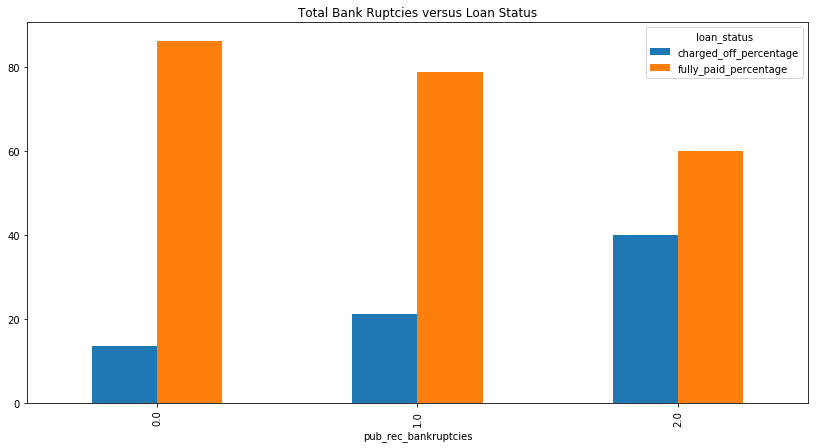

In [260]:
## Bivariate analysis on loan status and pub_rec_bankruptcies


loan_crosstab = pd.crosstab(loan['pub_rec_bankruptcies'], loan['loan_status'])
loan_crosstab['sum_of_charged_off_and_fully_paid'] = loan_crosstab['Charged Off'] + loan_crosstab['Fully Paid']

### calculating percentages 
loan_crosstab['charged_off_percentage'] = round((loan_crosstab['Charged Off']/loan_crosstab.sum_of_charged_off_and_fully_paid)*100, 2)
loan_crosstab['fully_paid_percentage'] = round((loan_crosstab['Fully Paid']/loan_crosstab.sum_of_charged_off_and_fully_paid)*100, 2)

######## dropping unnecessary columns in contingency table
loan_crosstab.drop(columns=['Charged Off', 'Fully Paid', 'sum_of_charged_off_and_fully_paid'], inplace=True)
print(loan_crosstab)

loan_crosstab.sort_values(by='charged_off_percentage').plot.bar(stacked=False, figsize=(14,7),  title='Total Bank Ruptcies versus Loan Status')

**inference**:Customer with public record bankruptcies more than 1 are more likely to get defaulted.

loan_status   charged_off_percentage  fully_paid_percentage
issue_d_year                                               
2007                           33.33                  66.67
2008                           15.19                  84.81
2009                           12.23                  87.77
2010                           12.13                  87.87
2011                           15.35                  84.65


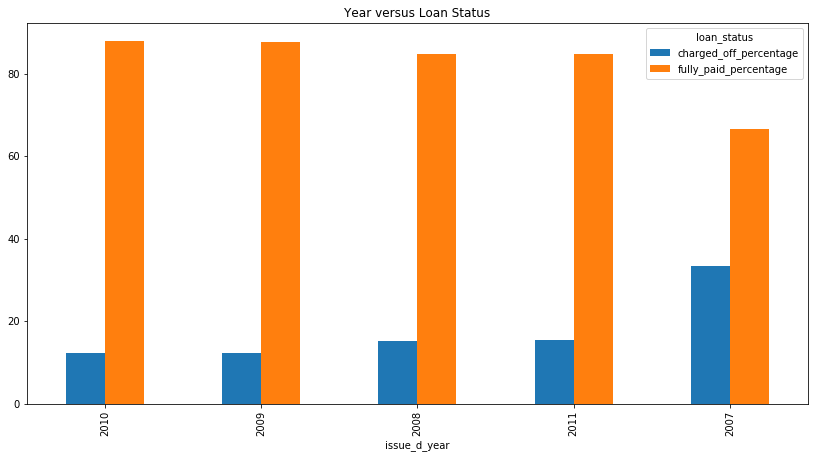

In [263]:
## Bivariate analysis on loan status and year

loan_crosstab = pd.crosstab(loan['issue_d_year'], loan['loan_status'])
loan_crosstab['sum_of_charged_off_and_fully_paid'] = loan_crosstab['Charged Off'] + loan_crosstab['Fully Paid']

### calculating percentages 
loan_crosstab['charged_off_percentage'] = round((loan_crosstab['Charged Off']/loan_crosstab.sum_of_charged_off_and_fully_paid)*100, 2)
loan_crosstab['fully_paid_percentage'] = round((loan_crosstab['Fully Paid']/loan_crosstab.sum_of_charged_off_and_fully_paid)*100, 2)

######## dropping unnecessary columns in contingency table
loan_crosstab.drop(columns=['Charged Off', 'Fully Paid', 'sum_of_charged_off_and_fully_paid'], inplace=True)
print(loan_crosstab)

loan_crosstab.sort_values(by='charged_off_percentage').plot.bar(stacked=False, figsize=(14,7),  title='Year versus Loan Status')

**inference**:In the year of 2007, there were more defaults.Clearly there is a steady increse in number of defaults as we get closer to the housing market crash of 2008


loan_status  charged_off_percentage  fully_paid_percentage
addr_state                                                
AK                            20.55                  79.45
AL                            11.84                  88.16
AR                            11.57                  88.43
AZ                            13.98                  86.02
CA                            15.26                  84.74
CO                            11.73                  88.27
CT                            11.93                  88.07
DC                             6.90                  93.10
DE                            10.48                  89.52
FL                            17.24                  82.76
GA                            15.48                  84.52
HI                            16.99                  83.01
IA                             0.00                 100.00
ID                             0.00                 100.00
IL                            13.54                  86.

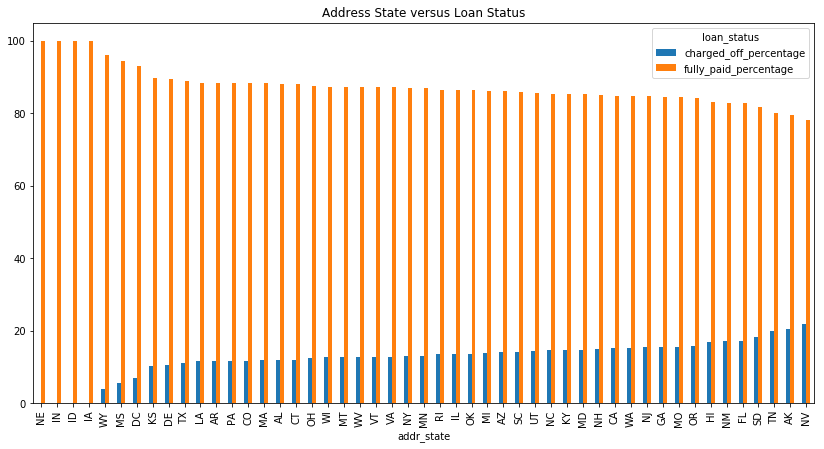

In [265]:
## Bivariate analysis on loan status and addr_state


loan_crosstab = pd.crosstab(loan['addr_state'], loan['loan_status'])
loan_crosstab['sum_of_charged_off_and_fully_paid'] = loan_crosstab['Charged Off'] + loan_crosstab['Fully Paid']

### calculating percentages
loan_crosstab['charged_off_percentage'] = round((loan_crosstab['Charged Off']/loan_crosstab.sum_of_charged_off_and_fully_paid)*100, 2)
loan_crosstab['fully_paid_percentage'] = round((loan_crosstab['Fully Paid']/loan_crosstab.sum_of_charged_off_and_fully_paid)*100, 2)

######## dropping unnecessary columns in contingency table
loan_crosstab.drop(columns=['Charged Off', 'Fully Paid', 'sum_of_charged_off_and_fully_paid'], inplace=True)
print(loan_crosstab)
loan_crosstab.sort_values(by='charged_off_percentage').plot.bar(stacked=False, figsize=(14,7),  title='Address State versus Loan Status')

**inference**:TN,AK,NV has seen most of numbers of default cases compared to other states.Lending club should be extra cautious while lending 
    in these states

Now lets take only those features which we consider to be available to the investors before the loan is sanctioned. 
Obviously we have gone through data dictionary and taken our best possible assumptions

In [16]:
col_to_check = ['addr_state', 'annual_inc', 'application_type', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'grade', 'home_ownership', 'id', 'initial_list_status', 'installment', 'int_rate', 'issue_d', 'loan_amnt', 'loan_status', 'mort_acc', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util', 'sub_grade', 'term', 'title', 'total_acc', 'verification_status', 'zip_code']

In [27]:
loan=pd.read_csv("loan.csv",low_memory=False)

In [30]:
loan.shape

(39717, 111)

In [17]:
loan[col_to_check]

,addr_state,annual_inc,application_type,dti,earliest_cr_line,emp_length,emp_title,grade,home_ownership,id,initial_list_status,installment,int_rate,issue_d,loan_amnt,loan_status,mort_acc,open_acc,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,zip_code
0,AZ,24000.0,INDIVIDUAL,27.65,Jan-85,10+ years,NaN,B,RENT,1077501,f,162.87,10.65%,Dec-11,5000,Fully Paid,NaN,3,0,0.0,credit_card,13648,83.70%,B2,36 months,Computer,9,Verified,860xx
1,GA,30000.0,INDIVIDUAL,1.00,Apr-99,< 1 year,Ryder,C,RENT,1077430,f,59.83,15.27%,Dec-11,2500,Charged Off,NaN,3,0,0.0,car,1687,9.40%,C4,60 months,bike,4,Source Verified,309xx
2,IL,12252.0,INDIVIDUAL,8.72,Nov-01,10+ years,NaN,C,RENT,1077175,f,84.33,15.96%,Dec-11,2400,Fully Paid,NaN,2,0,0.0,small_business,2956,98.50%,C5,36 months,real estate business,10,Not Verified,606xx
3,CA,49200.0,INDIVIDUAL,20.00,Feb-96,10+ years,AIR RESOURCES BOARD,C,RENT,1076863,f,339.31,13.49%,Dec-11,10000,Fully Paid,NaN,10,0,0.0,other,5598,21%,C1,36 months,personel,37,Source Verified,917xx
4,OR,80000.0,INDIVIDUAL,17.94,Jan-96,1 year,University Medical Group,B,RENT,1075358,f,67.79,12.69%,Dec-11,3000,Current,NaN,15,0,0.0,other,27783,53.90%,B5,60 months,Personal,38,Source Verified,972xx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,CO,110000.0,INDIVIDUAL,11.33,Nov-90,4 years,FiSite Research,A,MORTGAGE,92187,f,78.42,8.07%,Jul-07,2500,Fully Paid,NaN,13,0,NaN,home_improvement,7274,13.10%,A4,36 months,Home Improvement,40,Not Verified,802xx
39713,NC,18000.0,INDIVIDUAL,6.40,Dec-86,3 years,"Squarewave Solutions, Ltd.",C,RENT,90665,f,275.38,10.28%,Jul-07,8500,Fully Paid,NaN,6,0,NaN,credit_card,8847,26.90%,C1,36 months,Retiring credit card debt,9,Not Verified,274xx
39714,MA,100000.0,INDIVIDUAL,2.30,Oct-98,< 1 year,NaN,A,MORTGAGE,90395,f,156.84,8.07%,Jul-07,5000,Fully Paid,NaN,11,0,NaN,debt_consolidation,9698,19.40%,A4,36 months,MBA Loan Consolidation,20,Not Verified,017xx
39715,MD,200000.0,INDIVIDUAL,3.72,Nov-88,< 1 year,NaN,A,MORTGAGE,90376,f,155.38,7.43%,Jul-07,5000,Fully Paid,NaN,17,0,NaN,other,85607,0.70%,A2,36 months,JAL Loan,26,Not Verified,208xx


In [8]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [13]:
list_cols = list(loan.columns)

In [32]:
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [41]:
loan['installment'].describe()


count    38577.000000
mean       322.466318
std        208.639215
min         15.690000
25%        165.740000
50%        277.860000
75%        425.550000
max       1305.190000
Name: installment, dtype: float64

Installment range from 15.69 to 1,305, with a median of 277.

In [42]:
loan.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.0,336.175006,217.051841,22.79,168.5550,293.87,457.840,1305.19
Fully Paid,32950.0,320.125232,207.081110,15.69,165.2825,275.65,420.735,1295.21


loans that are charged off have significantly higher installments

In [43]:
loan['home_ownership'].replace(['NONE', 'ANY'], 'OTHER', inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [44]:
loan['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [46]:
loan.groupby('home_ownership')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

home_ownership
MORTGAGE    0.136713
OTHER       0.178218
OWN         0.148908
RENT        0.153626
Name: loan_status, dtype: float64

Charge off rate is higher for OWN and RENT 

since annual_inc has a high number of value so changed it to log scale

In [48]:
loan['log_annual_inc'] = loan['annual_inc'].apply(lambda x: np.log10(x+1))
loan.groupby('loan_status')['log_annual_inc'].describe()


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.0,4.723318,0.243179,3.610767,4.568213,4.724284,4.875067,6.096910
Fully Paid,32950.0,4.770901,0.242438,3.602169,4.614198,4.778158,4.924284,6.778151


In [51]:
loan['charged_off'] = (loan['loan_status'] == 'Charged Off').apply(np.uint8)
loan.drop('loan_status', axis=1, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [52]:
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,log_annual_inc,charged_off
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,4.380229,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,4.477136,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,4.088242,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [49]:
#Calculate charge off rate by percentage
loan.groupby('purpose')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off'].sort_values()

purpose
major_purchase        0.103256
wedding               0.103672
car                   0.106738
credit_card           0.107818
home_improvement      0.120696
vacation              0.141333
debt_consolidation    0.153254
medical               0.155653
moving                0.159722
house                 0.160763
other                 0.163777
educational           0.172308
renewable_energy      0.186275
small_business        0.270810
Name: loan_status, dtype: float64

We can see that purpose as small_business has high charge off

In [55]:
charge_off = loan['charged_off']

In [63]:
corr = loan.corrwith(charge_off, axis = 0) 


In [65]:
corr = pd.DataFrame(corr,columns = ['correlation'])

In [69]:
corr['corr_abs'] = corr.apply(abs)

In [70]:
corr

,correlation,corr_abs
id,0.042390,0.042390
member_id,0.039798,0.039798
loan_amnt,0.059463,0.059463
funded_amnt,0.056497,0.056497
funded_amnt_inv,0.037781,0.037781
int_rate,0.211390,0.211390
installment,0.027153,0.027153
annual_inc,-0.040867,0.040867
dti,0.045078,0.045078
delinq_2yrs,0.020096,0.020096


In [71]:
corr.sort_values(by='corr_abs', ascending=False)

,correlation,corr_abs
charged_off,1.000000,1.000000
recoveries,0.339562,0.339562
total_rec_prncp,-0.334944,0.334944
total_pymnt,-0.235898,0.235898
total_pymnt_inv,-0.232906,0.232906
last_pymnt_amnt,-0.222524,0.222524
int_rate,0.211390,0.211390
collection_recovery_fee,0.204914,0.204914
total_rec_late_fee,0.165115,0.165115
inq_last_6mths,0.071878,0.071878


important indicators are int_rate,loan_amnt,pub_rec_bankruptcies,dti,annual income 
We have ignored a lot of highly correlated variables as they are assigned after the loan is sanctioned which is not 
in our case